In [1]:
import sys

sys.path.append("../")
import jax
import jax.numpy as jnp
from neat_jax import forward, make_network, plot_network

from neat_jax import (
    get_active_connections,
    forward_toggled_nodes,
    toggle_receivers,
    get_required_activations,
    update_depth,
    ActivationState,
    Network
)

## ***Topology 1:***

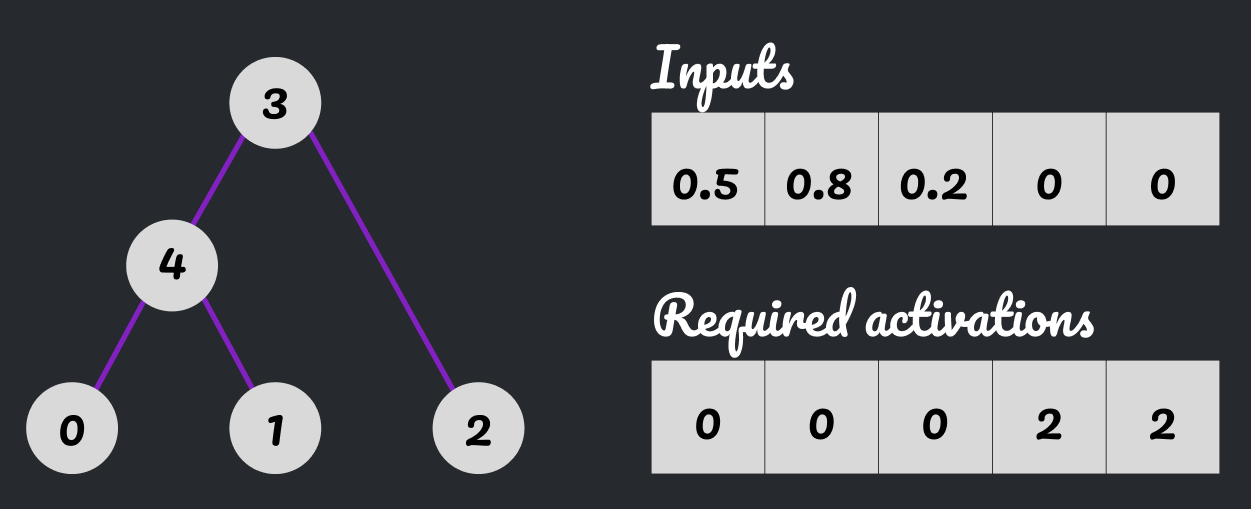
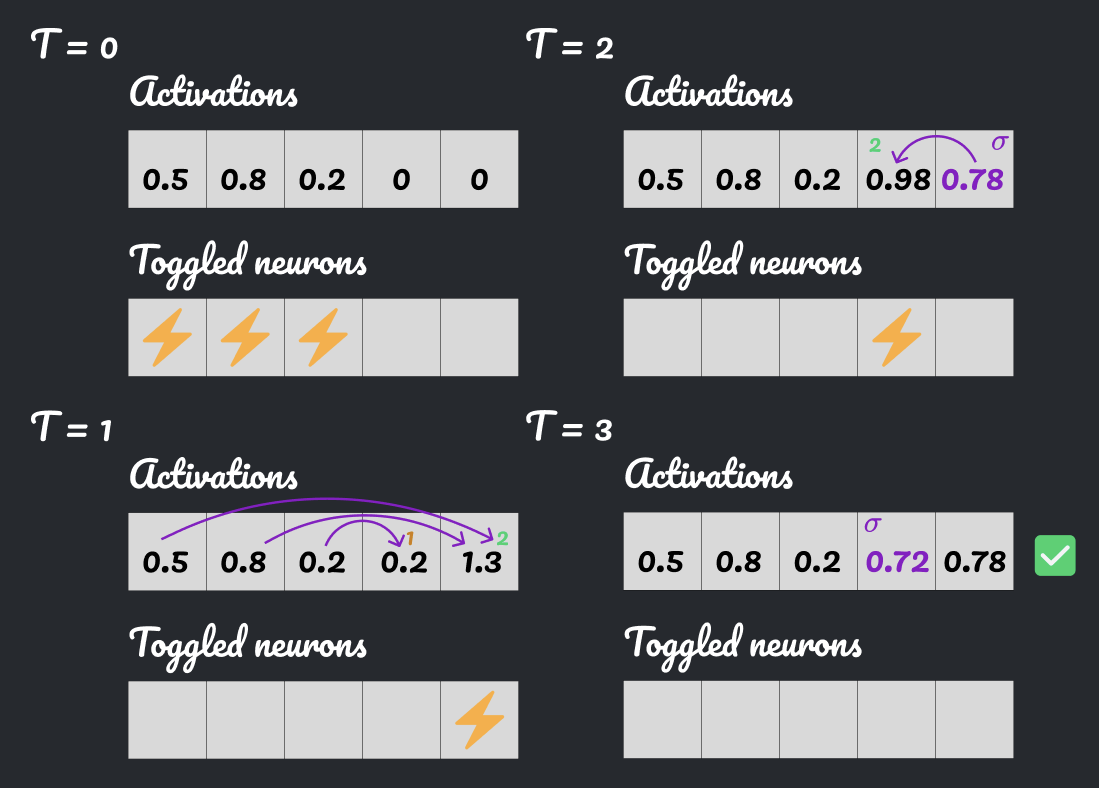

In [2]:
params = {"max_nodes": 10}

init_params = {
    "max_nodes": params["max_nodes"],
    "senders": jnp.array([0, 1, 2, 4], dtype=jnp.int32),
    "receivers": jnp.array([4, 4, 3, 3], dtype=jnp.int32),
    "weights": jnp.array([1, 1, 1, 1], dtype=jnp.float32),
    "activation_fns": jnp.array([0, 0, 0, 0, 0], dtype=jnp.int32),
    "node_types": jnp.array([0, 0, 0, 2, 1], dtype=jnp.int32),
    "inputs": jnp.array([0.5, 0.8, 0.2], dtype=jnp.float32),
    # "output_size": 1,
}

values: [0.5      0.8      0.2      0.985835 0.785835 0.       0.       0.
 0.       0.      ]
toggled: [0 0 0 0 0 0 0 0 0 0]
activation_counts: [0 0 0 2 2 0 0 0 0 0]
has_fired: [1 1 1 0 1 0 0 0 0 0]
node_depths: [0 0 0 0 0 0 0 0 0 0]
outdated_depths: True


(, Array([0.985835], dtype=float32))

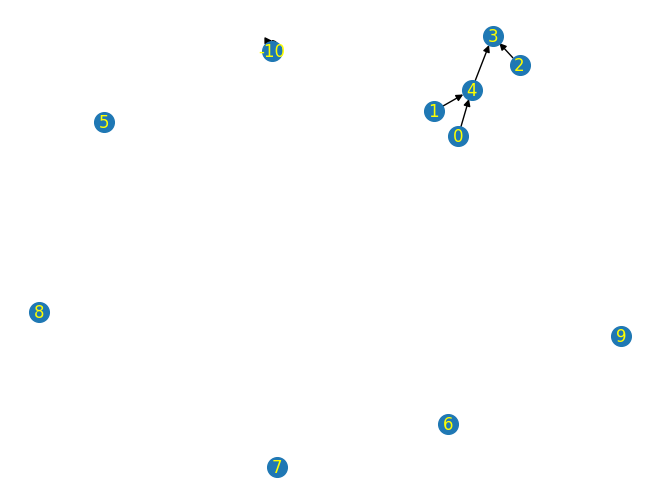

In [3]:
activation_state, net = make_network(**init_params)
plot_network(net)
activation_state, output = forward(activation_state, net, params["max_nodes"], 1)
activation_state, output

## ***Topology 2:***

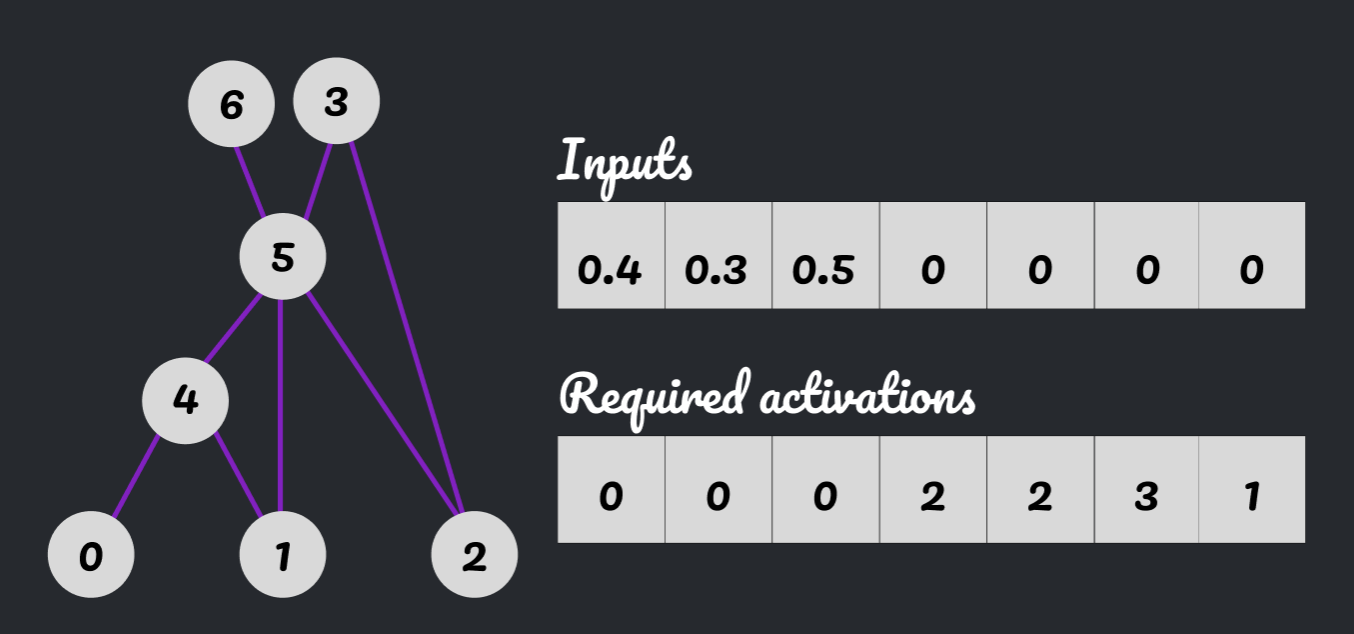
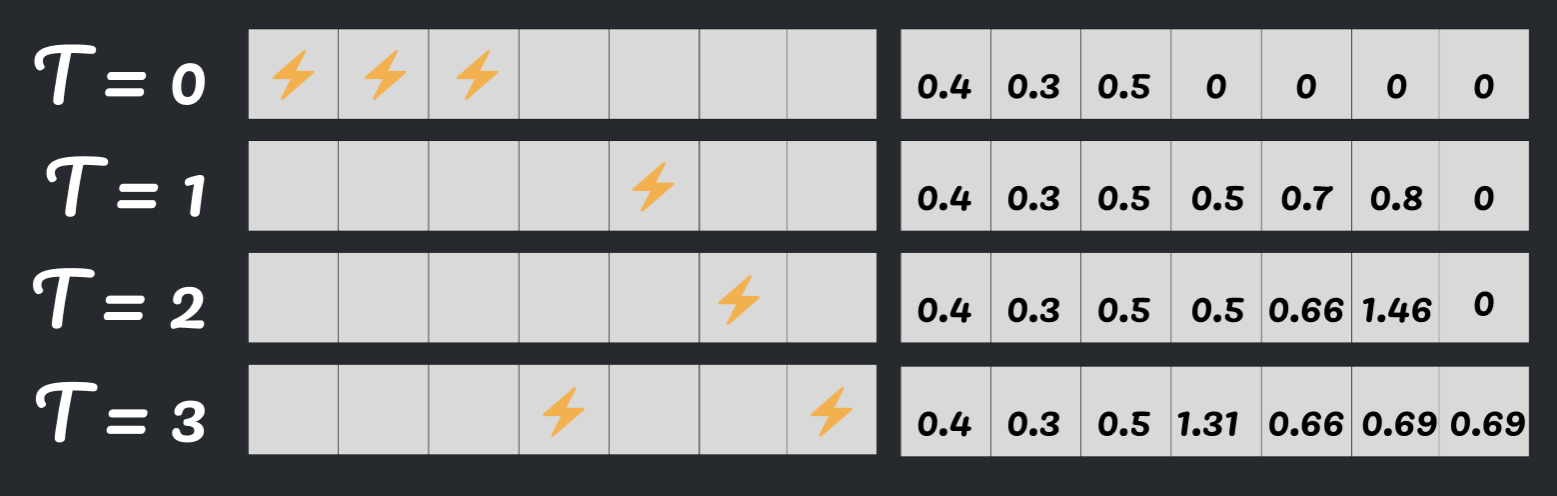


Step 0:
Values: [0.4        0.3        0.5        0.5        0.70000005 0.8
 0.         0.        ]
Toggled: [0 0 0 0 1 0 0 1]
Activation Counts: [0 0 0 1 2 2 0 0]

Step 1:
Values: [0.4       0.3       0.5       0.5       0.6681878 1.4681878 0.
 0.       ]
Toggled: [0 0 0 0 0 1 0 1]
Activation Counts: [0 0 0 1 2 3 0 0]

Step 2:
Values: [0.4        0.3        0.5        1.3127818  0.6681878  0.69270194
 0.69270194 0.        ]
Toggled: [0 0 0 0 0 0 0 0]
Activation Counts: [0 0 0 2 2 3 1 0]


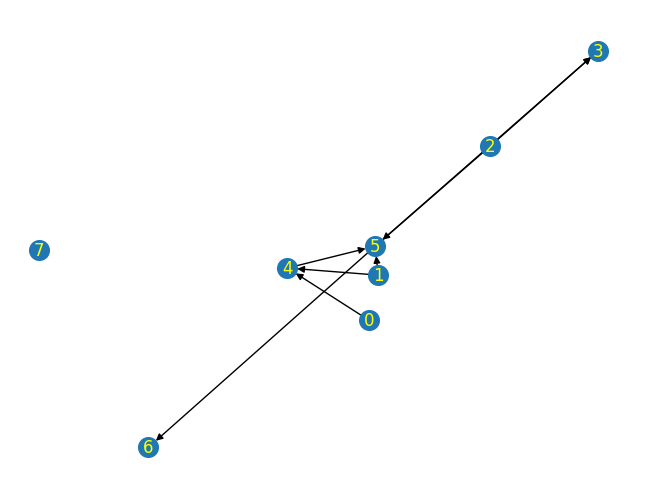

In [4]:
max_nodes = 8  # rename: max_connections

init_params = {
    "max_nodes": max_nodes,
    "senders": jnp.array([0, 1, 1, 2, 2, 4, 5, 5]),
    "receivers": jnp.array([4, 4, 5, 3, 5, 5, 3, 6]),
    "weights": jnp.array([1, 1, 1, 1, 1, 1, 1, 1]),
    "activation_fns": jnp.array([0, 0, 0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1, 1, 2]),
    "inputs": jnp.array([0.4, 0.3, 0.5]),
    "output_size": 2,
}

activation_state, net = make_network(**init_params)
plot_network(net)

for i in range(3):
    senders, receivers = get_active_connections(activation_state, net, max_nodes)
    activation_state = forward_toggled_nodes(
        senders, receivers, activation_state, net
    )
    activation_state = toggle_receivers(activation_state, net, max_nodes)
    print(f"\nStep {i}:")
    print(f"Values: {activation_state.values}")
    print(f"Toggled: {activation_state.toggled}")
    print(f"Activation Counts: {activation_state.activation_counts}")

In [5]:
activation_state, net = make_network(**init_params)
activation_state, output = forward(activation_state, net, max_nodes, 2, activate_final=True)
activation_state, output

values: [0.4        0.3        0.5        1.3127818  0.6681878  0.69270194
 0.69270194 0.        ]
toggled: [0 0 0 0 0 0 0 0]
activation_counts: [0 0 0 2 2 3 1 0]
has_fired: [1 1 1 0 1 1 0 0]
node_depths: [0 0 0 0 0 0 0 0]
outdated_depths: True


(, Array([0.7879783, 0.6665677], dtype=float32))

In [6]:
max_nodes = 15  # rename: max_connections

init_params = {
    "max_nodes": max_nodes,
    "senders": jnp.array([0, 1, 1, 2, 2, 4, 5, 5]),
    "receivers": jnp.array([4, 4, 5, 3, 5, 5, 3, 6]),
    "weights": jnp.array([1, 1, 1, 1, 1, 1, 1, 1]),
    "activation_fns": jnp.array([0, 0, 0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1, 1, 2]),
    "inputs": jnp.array([0.4, 0.3, 0.5]),
    "output_size": 2,
}

activation_state, net = make_network(**init_params)

senders, receivers = get_active_connections(activation_state, net, max_nodes)
    
net, senders, receivers

node_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
node_types: [0 0 0 2 1 1 2 3 3 3 3 3 3 3 3]
activation_fns: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
weights: [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
senders: [  0   1   1   2   2   4   5   5 -15 -15 -15 -15 -15 -15 -15]
receivers: [  4   4   5   3   5   5   3   6 -15 -15 -15 -15 -15 -15 -15]
output_size: 2


(,
 Array([  0,   1,   1,   2,   2, -15, -15, -15, -15, -15, -15, -15,  -1,
         -1,  -1], dtype=int32),
 Array([  4,   4,   5,   3,   5, -15, -15, -15, -15, -15, -15, -15,  -1,
         -1,  -1], dtype=int32))

In [7]:
activation_state, output = forward(activation_state, net, max_nodes, 2, activate_final=True)
activation_state

values: [0.4        0.3        0.5        1.3127818  0.6681878  0.69270194
 0.69270194 0.         0.         0.         0.         0.
 0.         0.         0.        ]
toggled: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
activation_counts: [0 0 0 2 2 3 1 0 0 0 0 0 0 0 0]
has_fired: [1 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
node_depths: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
outdated_depths: True


In [8]:
update_depth(activation_state, net, max_nodes)

values: [0.4 0.3 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
toggled: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
activation_counts: [0 0 0 2 2 3 1 0 0 0 0 0 0 0 0]
has_fired: [1 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
node_depths: [0 0 0 3 1 2 3 0 0 0 0 0 0 0 0]
outdated_depths: False
